In [70]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
df=pd.read_csv("data.csv")

In [72]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [73]:
x=df.drop('Unnamed: 32',inplace=True, axis = 1)
x=df.drop('diagnosis', axis = 1)

y=df['diagnosis']

In [74]:
cols = ['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
        'compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concave points_se',
        'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
        'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

# Using Label Encoder

In [75]:
le = LabelEncoder()
for col in cols:
     x[col]=le.fit_transform(x[col])
y=le.fit_transform(y)
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,41,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,42,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,488,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,489,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,490,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=50)

In [77]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0])

In [78]:
knn_accuracy=accuracy_score(y_test,y_predict)
knn_accuracy

0.9473684210526315

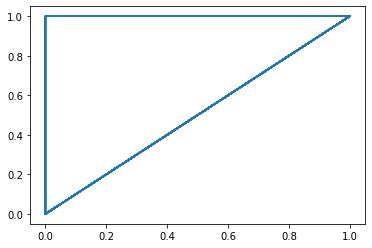

In [79]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_predict)

In [80]:
confusion_matrix_knn = pd.crosstab(y_test , y_predict, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_knn

Predicted,0,1
Actual,,
0,69,6
1,0,39


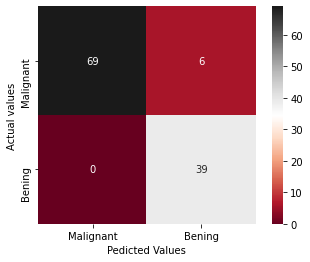

In [81]:
output=['Malignant','Bening']
sns.heatmap(confusion_matrix_knn,square=True, annot=True,cmap="RdGy",xticklabels=output,yticklabels=output,fmt=".0f")
plt.ylabel("Actual values");
plt.xlabel("Pedicted Values");

# Using One Hot Encoder

In [82]:
# define one hot encoding
encoder = OneHotEncoder(sparse=True)
# transform data
#onehot = encoder.fit_transform(x)
#print(onehot)

for col in cols:
     x[col]=encoder.fit_transform(x[col])
y=encoder.fit_transform(y)
x.head()

ValueError: Expected 2D array, got 1D array instead:
array=[ 41  42 488 489 490  43  44 491  45 492  46 493  47  48 494 495  49 496
  50 385 386 387 388  51  52  53  54  55  56  57  58  59 497  60  61  62
  63  64  65  66  67  68  69  70 498  71 499   4  72  73  74  75  76  77
  78 500  79  80  81  82  83  84  85  86 501  87  88  89  90  91  92  93
  94  95 389 390 391 392 393 394  96 395 396 397 398 399 502 503  97  98
  99 100 101 102 103   5   6 104 105 106 107 108 109 110 111 112 113 114
   7 115 116   8   9 117 118 119 120 121 122 123 124  10 125 126 127  11
 128 129 130 131 132   0 504 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 505 506 147 558 559 400  12 401 402 403 404 148 149 405 406
 150 407 408 409  13 410 411 412 507  14  15 151 152 153 154 508 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 509 171 172 173
 174 175 176 177 178  16  17 179 180 181 413 414 560 415 416 561 417 418
 419 420 421 510 422 423 424 425 426 511 512 513 514 182 183 515 516 517
 184 518 519 185 186 520 521 187 188 522 189 190 191 192 523 193 194 524
 195 427 196 197 525 198 199 526 200 201 202 203 204 527 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443  18 444 445 446 447   1
 448 528 529   2 205 206 207 208 209 210 211 212 213 214 530 215  19 216
  20  21 217 218 219 531 532 220 221 222 223 224 225 226 227 228 229 230
 533 534  22 231 449 232 233 234 235 236 237 535 238 239 240  23  24 241
  25 242 536 243 244  26 245 246 247 248 249 450 250 451 452 251 453 562
 563 252 454 455 456 253 457 458 459 460 461 462 463 254 464 255 256 465
 466 467 257 258  27  28 259  29 260 261 262  30 537 263 264 265 266 267
 538 539 268 269 540 270 271   3 272 273 274 275 541 276 277 278 279 280
 281 282 283 542 284 285 286 287 288 289 290 291 292  31 543 544 293 294
 295 296 297 298 299 300 301 302 303 304 545 305 468 469 470 471 306 564
 472 473 474 307 308 475 476 477 478 479 565 566 480 567 568 481 482 483
 484 309 485 486 310 487 311 312 313 314 315 316 317  32 318 319 320 321
 322 323 324 325 546 547 326 327 328 329 330 331 332  33 333  34  35 334
 335 336 548 549 337 338  36 339 340 341 550 342 343 344 345 346 347 551
  37 348 349  38 552 553 350 351  39 554 555 556 352 353 557 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384  40].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(x)
en = encoder.transform(x)

In [84]:
print(en)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [85]:
print('Input', en.shape)

Input (569, 15909)


# ONE HOT ENCODING

In [86]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(url, header=None)
data = dataset.values
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53
